# Config

In [1]:
num_classes = 50

test_batch_size = 16

# Dataset

In [2]:
from utils import dataset

In [3]:
test_set = dataset.ClothingDataset('../data/Annotations/', train='test')
test_set.imgs.drop(test_set.imgs[test_set.imgs['class']!=15].index, inplace=True)
test_set.imgs.reset_index(drop=True, inplace=True)

Dropped 175 images with box area 0


In [4]:
len(test_set.imgs)

12

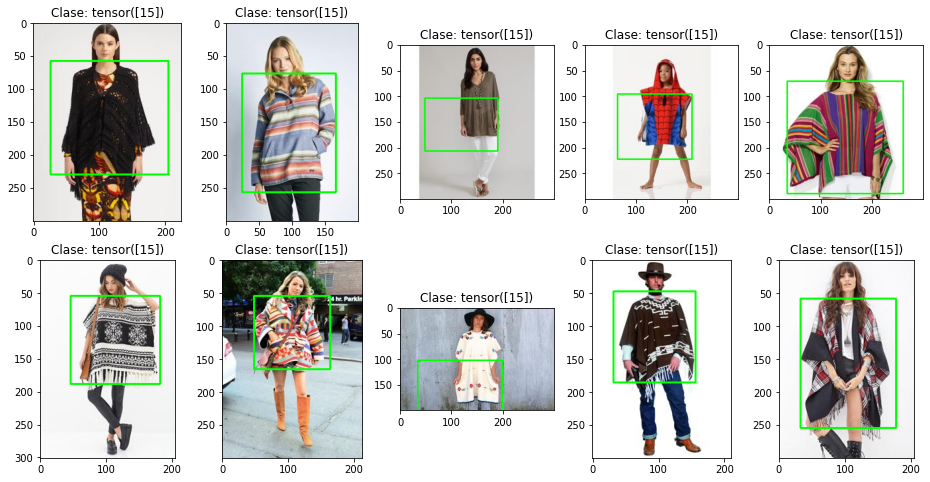

In [5]:
test_set.plot()

# Evaluate

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils import trainer, evaluator

In [28]:
model = torch.load('./checkpoints/retinanet_base_init.pt')

In [94]:
from utils import utils
dataloader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True, collate_fn=utils.collate_fn)

In [101]:
import torchvision
model = torchvision.models.detection.retinanet_resnet50_fpn(num_classes=num_classes, 
                                                            pretrained_backbone=True)
train = trainer.Trainer(model=model,
                        dataset=test_set,
                        n_classes=50, 
                        train_batch_size=8, 
                        train_size=0.7, 
                        lr_scheduler=None, 
                        use_gpu=True)

checkpoints_path='./checkpoints'
checkpoint_prefix='retinanet_base_'

train_loss, validation_loss = train.train(epochs=3, 
                                          checkpoints_path=checkpoints_path, 
                                          checkpoint_prefix=checkpoint_prefix)

model = train.model

Epoch: [0]  [0/1]  eta: 0:00:00  lr: 0.001000  loss: 2.5687 (2.5687)  classification: 1.7279 (1.7279)  bbox_regression: 0.8408 (0.8408)  time: 0.4592  data: 0.0089  max mem: 6626
Epoch: [0] Total time: 0:00:00 (0.4597 s / it)
Test:  [0/4]  eta: 0:00:00  loss: 7.6181 (7.6181)  classification: 4.5053 (4.5053)  bbox_regression: 3.1128 (3.1128)  time: 0.0349  data: 0.0025  max mem: 6626
Test:  [3/4]  eta: 0:00:00  loss: 2.8700 (4.3572)  classification: 1.6338 (2.5320)  bbox_regression: 1.5262 (1.8252)  time: 0.0333  data: 0.0020  max mem: 6626
Test: Total time: 0:00:00 (0.0335 s / it)
Epoch: [1]  [0/1]  eta: 0:00:00  lr: 0.001000  loss: 4.4820 (4.4820)  classification: 2.5164 (2.5164)  bbox_regression: 1.9656 (1.9656)  time: 0.4416  data: 0.0078  max mem: 6626
Epoch: [1] Total time: 0:00:00 (0.4420 s / it)
Test:  [0/4]  eta: 0:00:00  loss: 4.4394 (4.4394)  classification: 1.3244 (1.3244)  bbox_regression: 3.1151 (3.1151)  time: 0.0358  data: 0.0028  max mem: 6626
Test:  [3/4]  eta: 0:00:00

In [102]:
model.eval()
for image, target in dataloader:
    image = list(img.to('cuda') for img in image)
    pred = model(image)
    print(pred)
    break

[{'boxes': tensor([[ 63.3413,  35.6792, 111.1662, 224.0000],
        [ 13.3055,  41.0127,  60.9371, 224.0000],
        [ 46.8529,  36.8128,  94.5523, 224.0000],
        ...,
        [ 37.1745, 224.0000,  43.6572, 224.0000],
        [180.5178, 224.0000, 186.9923, 224.0000],
        [ 34.9377, 224.0000,  41.4193, 224.0000]], device='cuda:0',
       grad_fn=<StackBackward0>), 'scores': tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000

In [11]:
evaluate = evaluator.Evaluator(model, test_set, n_classes=num_classes, batch_size=test_batch_size)

In [12]:
evaluate.plot()

[{'boxes': tensor([], device='cuda:0', size=(0, 4)), 'scores': tensor([], device='cuda:0'), 'labels': tensor([], device='cuda:0', dtype=torch.int64)}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'scores': tensor([], device='cuda:0'), 'labels': tensor([], device='cuda:0', dtype=torch.int64)}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'scores': tensor([], device='cuda:0'), 'labels': tensor([], device='cuda:0', dtype=torch.int64)}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'scores': tensor([], device='cuda:0'), 'labels': tensor([], device='cuda:0', dtype=torch.int64)}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'scores': tensor([], device='cuda:0'), 'labels': tensor([], device='cuda:0', dtype=torch.int64)}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'scores': tensor([], device='cuda:0'), 'labels': tensor([], device='cuda:0', dtype=torch.int64)}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'scores': tensor([], device='cuda:0'), 'labels'

IndexError: index 0 is out of bounds for dimension 0 with size 0

In [ ]:
#evaluate.evaluate()